In [1]:
# Kerakli kutubxonalarni yuklaymiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [82]:
# CSV fayldan ma'lumotlarni yuklab olamiz
df = pd.read_csv("C:/Users/user/Desktop/Data.csv")

In [5]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [7]:
# Ma'lumotlarning birinchi 5 ta qatorini ko'rib chiqamiz
print(df.head())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1       

In [88]:
# 3. Xususiyatlar (features) va maqsad ustunini (target) ajratamiz
X = df[['Clump Thickness', 'Uniformity of Cell Size']]  # o'zingiz haqiqiy ustun nomlarini yozing!
y = df['Mitoses']

In [76]:
X

,Bare Nuclei,Uniformity of Cell Size
0,1,1
1,10,4
2,2,1
3,4,8
4,1,1
...,...,...
678,2,1
679,1,1
680,3,10
681,4,8


In [61]:
y

0      1
1      1
2      1
3      1
4      1
      ..
678    1
679    1
680    2
681    1
682    1
Name: Mitoses, Length: 683, dtype: int64

In [63]:
# Ma'lumotlarni train va test to'plamlarga bo'lamiz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# KNN modelini yaratamiz
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 qo'shnilar bilan

In [21]:
knn

KNeighborsClassifier()

In [23]:
# Modelni o'qitamiz
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# Test ma'lumotlari uchun bashorat qilamiz
y_pred = knn.predict(X_test)

In [27]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1], dtype=int64)

In [29]:
# Natijalarni baholaymiz
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7853658536585366

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.99      0.88       163
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         8

    accuracy                           0.79       205
   macro avg       0.09      0.11      0.10       205
weighted avg       0.63      0.79      0.70       205



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# Confusion Matrixni chizamiz
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm

array([[161,   2,   0,   0,   0,   0,   0,   0,   0],
       [ 12,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  7,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0],
       [  7,   1,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

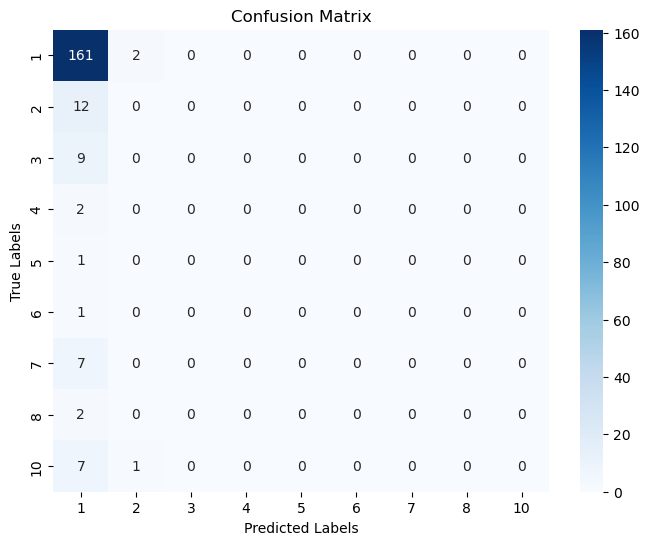

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [90]:
# 10. Agar 2ta feature bo'lsa - qaror chegarasi (decision boundary) grafik chizamiz
x_min, x_max = X['Clump Thickness'].min() - 1, X['Clump Thickness'].max() + 1
y_min, y_max = X['Uniformity of Cell Size'].min() - 1, X['Uniformity of Cell Size'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [92]:
# Griddagi barcha nuqtalarda modelni bashorat qilamiz
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KeyError: 'Bare Nuclei'

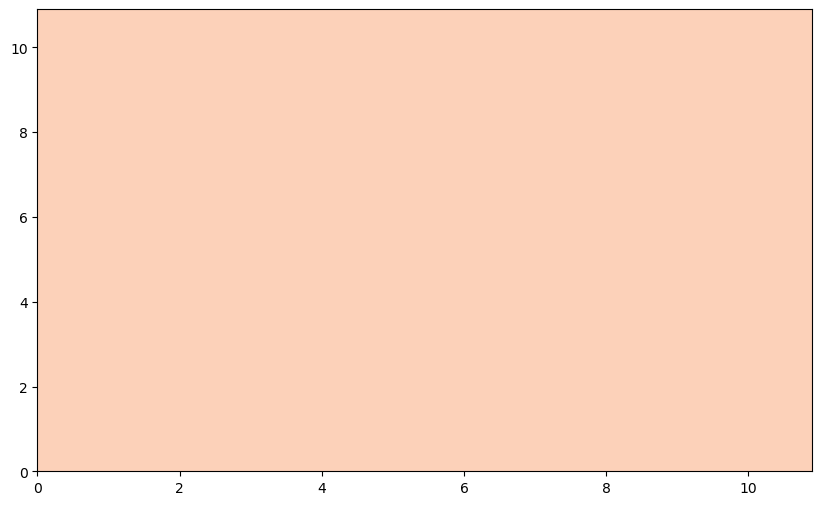

In [74]:
# Qaror chegarasini chizamiz
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_test['Clump Thickness X_test['Uniformity of Cell Size'], c=y_test, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('KNN Classification Decision Boundary')
plt.xlabel('Bare Nuclei')
plt.ylabel('Uniformity of Cell Size')
plt.show()